In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv("Mall_Customers.csv")      
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_scaler = sc.fit_transform(x)

In [18]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
y_optics = optics.fit_predict(x_scaler)

C:\Users\Hxtreme\anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Hxtreme\anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Hxtreme\anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Hxtreme\anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Hxtreme\anaconda3\envs\AI

In [19]:
optics.labels_

array([-1,  2,  4,  2, -1,  2,  4, -1,  4,  2,  4, -1,  4,  2,  4,  2, -1,
        2, -1, -1, -1,  2,  4,  2,  4, -1, -1, -1, -1, -1,  4,  2,  4, -1,
        4, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  6, -1,  5, -1,  6,  3,  5,  3,  5, -1,  5,  3,  6,
        3,  5,  3,  5,  3,  6, -1,  6,  3,  6, -1,  5, -1,  6,  3,  6,  3,
        5,  3,  6,  3,  5,  3,  5, -1,  5,  3,  6, -1, -1, -1,  6, -1, -1,
       -1, -1, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

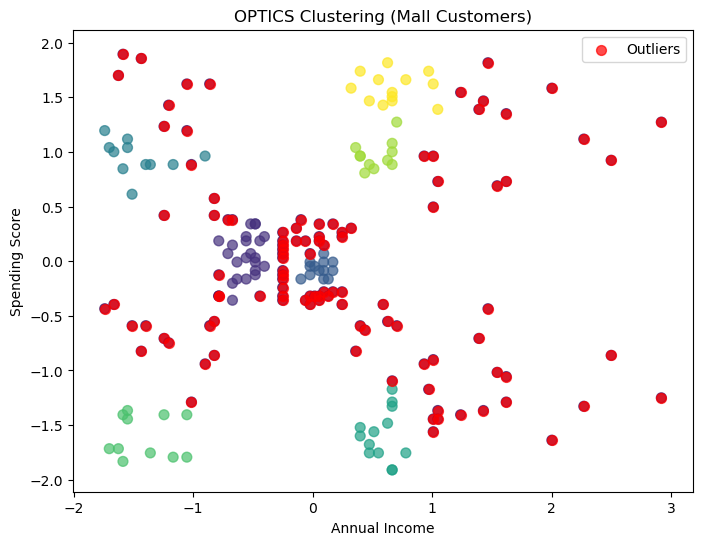

In [22]:
# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(x_scaler[:,0], x_scaler[:,1], c=y_optics, cmap='viridis', s=50, alpha=0.7)

# Highlight outliers (label = -1)
outliers = (y_optics == -1)
plt.scatter(x_scaler[outliers,0], x_scaler[outliers,1], c='red', s=50, alpha=0.7, label='Outliers')

plt.title("OPTICS Clustering (Mall Customers)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()